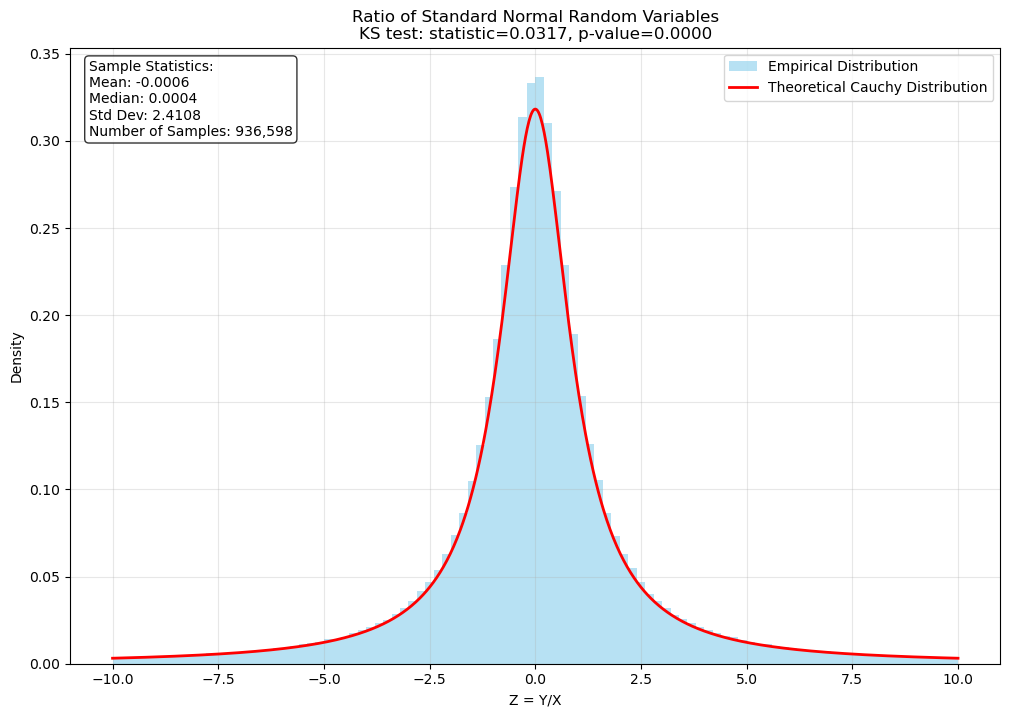


Validation of Properties:
1. Symmetry around 0:
  - Percentage of positive values: 0.5001
  - Percentage of negative values: 0.4999

2. Comparison of Quartiles:
  Theoretical vs Empirical
  Q1: -1.0000 vs -0.9022
  Q2: 0.0000 vs 0.0004
  Q3: 1.0000 vs 0.9045


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples for simulation
n_samples = 1000000

# Generate standard normal random variables
X = np.random.standard_normal(n_samples)
Y = np.random.standard_normal(n_samples)

# Calculate their ratio Z = Y/X
Z = Y / X

# Remove extreme outliers for better visualization
# Keep values within reasonable bounds ([-10, 10])
mask = (Z > -10) & (Z < 10)
Z_filtered = Z[mask]

# Create a range of z values for theoretical distribution
z = np.linspace(-10, 10, 1000)

# Calculate theoretical Cauchy PDF
theoretical_pdf = 1 / (np.pi * (1 + z**2))

# Create the visualization
plt.figure(figsize=(12, 8))

# Plot histogram of simulated data
plt.hist(Z_filtered, bins=100, density=True, alpha=0.6, 
         label='Empirical Distribution', color='skyblue')

# Plot theoretical Cauchy distribution
plt.plot(z, theoretical_pdf, 'r-', lw=2, 
         label='Theoretical Cauchy Distribution')

# Calculate and display KS test statistic
ks_statistic, p_value = stats.kstest(Z_filtered, 'cauchy')

# Add labels and title
plt.title('Ratio of Standard Normal Random Variables\n' +
          f'KS test: statistic={ks_statistic:.4f}, p-value={p_value:.4f}',
          fontsize=12)
plt.xlabel('Z = Y/X')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)

# Add text box with key statistics
stats_text = (
    f'Sample Statistics:\n'
    f'Mean: {np.mean(Z_filtered):.4f}\n'
    f'Median: {np.median(Z_filtered):.4f}\n'
    f'Std Dev: {np.std(Z_filtered):.4f}\n'
    f'Number of Samples: {len(Z_filtered):,}'
)
plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.show()

# Print additional validation
print("\nValidation of Properties:")
print(f"1. Symmetry around 0:")
print(f"  - Percentage of positive values: {(Z_filtered > 0).mean():.4f}")
print(f"  - Percentage of negative values: {(Z_filtered < 0).mean():.4f}")

# Calculate theoretical quantiles
theoretical_quantiles = stats.cauchy.ppf([0.25, 0.5, 0.75])
empirical_quantiles = np.percentile(Z_filtered, [25, 50, 75])

print("\n2. Comparison of Quartiles:")
print("  Theoretical vs Empirical")
print(f"  Q1: {theoretical_quantiles[0]:.4f} vs {empirical_quantiles[0]:.4f}")
print(f"  Q2: {theoretical_quantiles[1]:.4f} vs {empirical_quantiles[1]:.4f}")
print(f"  Q3: {theoretical_quantiles[2]:.4f} vs {empirical_quantiles[2]:.4f}")